## Validate and clean your data

In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as ps
import eda_functions as be

In [2]:
path = '~/Scripts/DS/DataIntoInsights/data/Modified_Unicorn_Companies.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   int64 
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1057 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1074 non-null   object
dtypes: int64(2), object(8)
memory usage: 84.0+ KB


In [7]:
be.miss_df(df)

,Total,Percent
City,17,0.015829
Company,0,0.000000
Valuation,0,0.000000
Date Joined,0,0.000000
Industry,0,0.000000
Country/Region,0,0.000000
Continent,0,0.000000
Year Founded,0,0.000000
Funding,0,0.000000
Select Investors,0,0.000000


In [8]:
be.invalid_df(df)

,columns,nulls,invalids,unique_item
0,Company,0,0,"[Bytedance, SpaceX, SHEIN, Stripe, Klarna, Can..."
1,Valuation,0,0,"[180, 100, 95, 46, 40, 39, 38, 33, 32, 27, 25,..."
2,Date Joined,0,0,"[2017-04-07, 2012-12-01, 2018-07-03, 2014-01-2..."
3,Industry,0,0,"[Artificial intelligence, Other, E-commerce & ..."
4,City,17,0,"[Beijing, Hawthorne, Shenzhen, San Francisco, ..."
5,Country/Region,0,0,"[China, United States, Sweden, Australia, Unit..."
6,Continent,0,0,"[Asia, North America, Europe, Oceania, South A..."
7,Year Founded,0,0,"[2012, 2002, 2008, 2010, 2005, 2015, 2013, 199..."
8,Funding,0,0,"[$8B, $7B, $2B, $4B, $572M, $3B, $14B, $5B, $9..."
9,Select Investors,0,0,"[Sequoia Capital China, SIG Asia Investments, ..."


In [9]:
## Applying data conversion into datetime &
## Creating a new column with info of how long it took to the 
## company to get to unicorn status.

df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Years To Unicorn'] = df['Date Joined'].dt.year - df['Year Founded']

In [10]:
# Identify and correct the issue with Years To Unicorn.

### YOUR CODE HERE ###

print('Companies with a negative Years To Unicorn (before cleaning):')

# Determine which companies have a negative years to unicorn
print(df[df['Years To Unicorn'] < 0]['Company'].values)

# Replacing the Year Founded for InVision with 2011 (which was determined from an internet search)
df.loc[df['Company'] == 'InVision', 'Year Founded'] = 2011

# Recalculating the Years to Unicorn column (to correct Invision's value)
df['Years To Unicorn'] = df['Date Joined'].dt.year - df['Year Founded']

# Calculate which companies have a negative years to unicorn to ensure data was properly cleaned
print('Companies with a negative Years To Unicorn (after cleaning):')
print(df[df['Years To Unicorn'] < 0]['Company'].values)

Companies with a negative Years To Unicorn (before cleaning):
['InVision']
Companies with a negative Years To Unicorn (after cleaning):
[]


In [11]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

Verify the industry labels provided by the business are the only possible values in `Industry`. If there are additional labels, correct the data so only the labels above are present in `Industry`.

In [12]:
# Correct misspelled Industry values in companies.

### YOUR CODE HERE ###

# Print the number of unique industries before any corrections
print(df['Industry'].nunique())

# Define a dictionary that maps the incorrect industry spellings to their correct industry spelling
industry_dct = {'Artificial Intelligence':'Artificial intelligence',
                'Data management and analytics':'Data management & analytics',
                'FinTech':'Fintech'}

# Rename the misspelled industry labels according to the dictionary defined above
df['Industry'] = df['Industry'].replace(industry_dct)

# Print the number of unique industries to validate only 15 are present
print(df['Industry'].nunique())

18
15


The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [13]:
## Checking and removing duplicate Company values in companies.

# Calculate the number of duplicated companies before cleaning
print('Number of duplicated companies (before cleaning):')
print(df['Company'].duplicated().sum())

# Remove duplicate rows in the Company column
df.drop_duplicates(subset=['Company'], inplace = True)

# Calculate the number of duplicated companies after cleaning
print('')
print('Number of duplicated companies (after cleaning):')
print(df['Company'].duplicated().sum())

Number of duplicated companies (before cleaning):
3

Number of duplicated companies (after cleaning):
0


### Change categorical data to numerical data

**Encoding approach**

* `Valuation` - Label encoding was used because the labels are ordered.
* `Continent` - One hot encoding was used because there are few labels and they are not ordered.
* `Country/Region` - Label encoding was used because there are many labels, although they are not ordered.
* `Industry` - One hot encoding was used because there are few labels and they are not ordered.

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [14]:
# Convert Valuation to numeric.

### YOUR CODE HERE ###

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
df['High Valuation'] = pd.qcut(df['Valuation'], 2, labels = ['No','Yes'])

# Convert High Valuation to numeric
df['High Valuation'] = df['High Valuation'].cat.codes

In [15]:
## Convert Continent to numeric data.

## Dmmy variables with Continent values
continents_encoded = pd.get_dummies(df['Continent'], drop_first = True)

## Adding DataFrame with dummy Continent labels back to companies data.
companies = pd.concat([df, continents_encoded], axis=1)

In [16]:
## Convert Country/Region to numeric data.

## Create numeric categoriews for Country/Region
companies['Country/Region'] = companies['Country/Region'].astype('category').cat.codes

In [17]:
## Convert Industry to numeric data.

## Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies['Industry'], drop_first = True)

## Add DataFrame with dummy Industry labels back to companies data.
companies = pd.concat([companies, industry_encoded], axis=1)

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose, these investors are called the 'Big 3' unicorn investment groups.

- Label encoding may make it more difficult to directly interpet what a column value represents. Further, it may introduce an unintended relationship between the categorical data in a dataset.
- Label encoding is effective when there are a large number of categorical variables and when the variables have a particular order. It is useful in machine learning models, such as decision trees and random forests.
- Label encoding changes the data by assigning each category a unique number instead of a qualitative value.

In [18]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

companies['Sequoia Capital'] = companies['Select Investors'].str.contains('Sequoia Capital')
companies['Sequoia Capital'] = companies['Sequoia Capital'].astype(int)

# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

companies['Tiger Global Management'] = companies['Select Investors'].str.contains('Tiger Global Management')
companies['Tiger Global Management'] = companies['Tiger Global Management'].astype(int)

# Create a dummy variable that denotes if Accel is a Select Investor.


companies['Accel'] = companies['Select Investors'].str.contains('Accel')
companies['Accel'] = companies['Accel'].astype(int)

# Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.


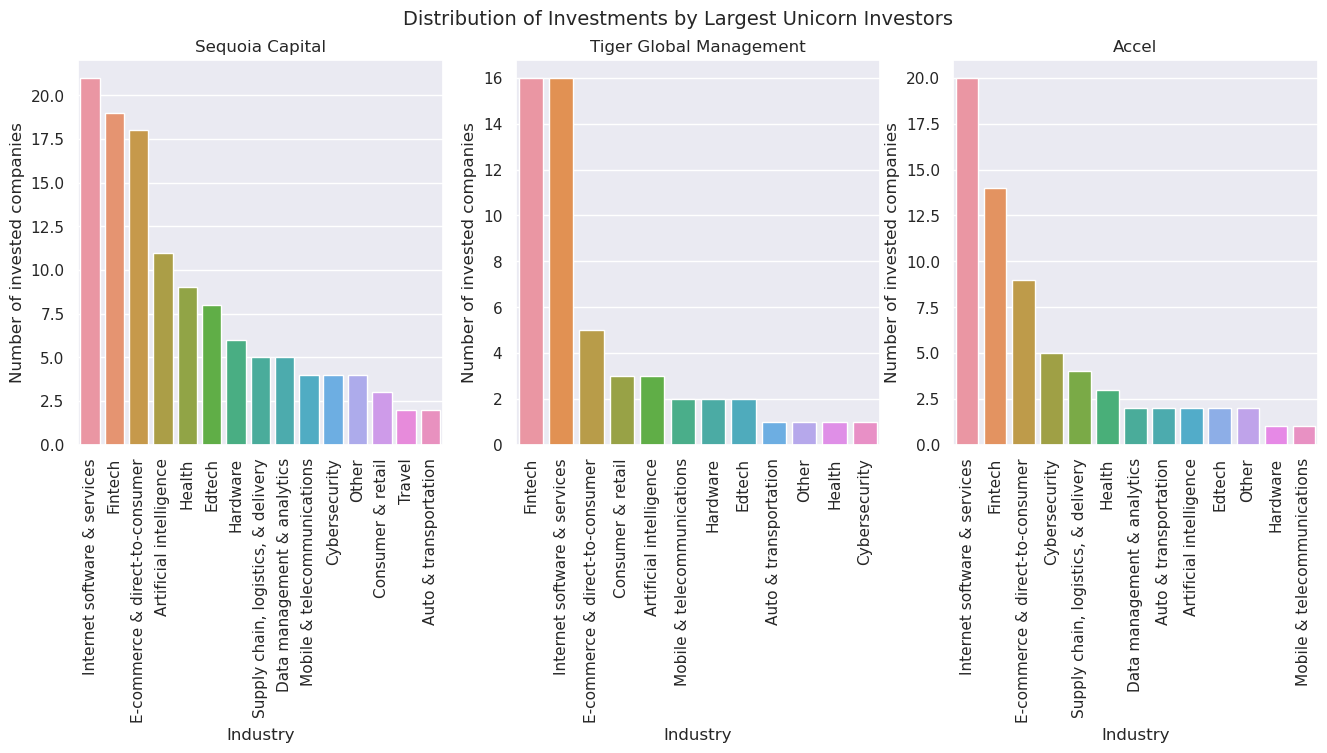

In [19]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))

# Setting a variable to count which axis the plot should go on
idx = 0

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management','Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Industry
    companies_sample = companies_sample['Industry'].value_counts()

    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set x-axis label
    axes[idx].set_xlabel("Industry")

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes to the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Distribution of Investments by Largest Unicorn Investors', fontsize = 14);

The three industries most commonly invested in by the top unicorn investors are: internet software and services, fintech, and e-commerce and direct-to-consumer.

Other insights include:
* Sequoia Capital is the only top unicorn investor to invest in travel unicorns.
* Tiger Global Management is the only top unicorn investor to not invest in supply chain and logistics.
* Accel has invested in more cybersecurity unicorns than Sequoia Capital and Tiger Global Management.

shows the continents of the unicorns invested in by the top three unicorn investors.

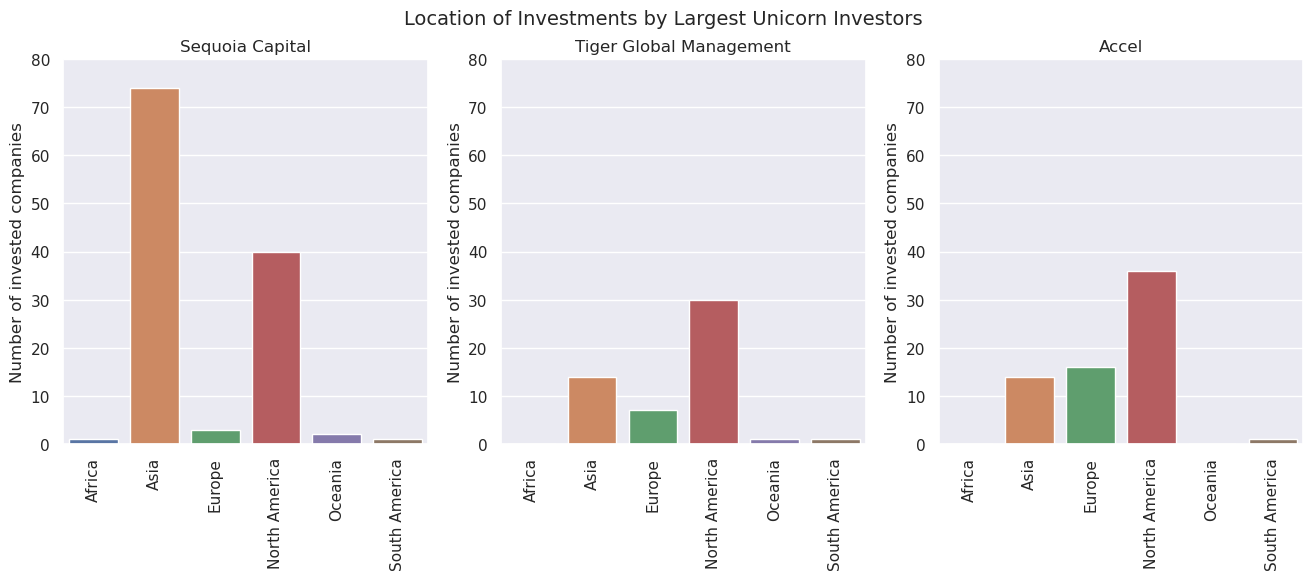

In [20]:
# Visualize the continents invested in by the top three unicorn investors.

# Create a 1x3 plot figure
fig, axes = plt.subplots(1, 3, figsize = (16,5))

# Setting a variable to count which axis the plot should go on
idx = 0

# Loop through a list of the three top unicorn investors
for c in ['Sequoia Capital', 'Tiger Global Management', 'Accel']:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Continent
    companies_sample = companies_sample['Continent'].value_counts()
    
    # Add Oceania as index with value 0 if not present in companies_sample
    if 'Oceania' not in companies_sample.index:
        companies_sample['Oceania'] = 0
        
    # Add Africa as index with value 0 if not present companies_sample
    if 'Africa' not in companies_sample.index:
        companies_sample['Africa'] = 0
        
    # Sort the index so the x axis for all plot is in alphabetical order
    companies_sample = companies_sample.sort_index()
    
    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set y range so all plots have same range
    axes[idx].set(ylim=(0, 80))

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes ot the next plot
    idx +=1

# Set the title of the whole plot
plt.suptitle('Location of Investments by Largest Unicorn Investors', fontsize = 14);

Sequoia Capital has a much stronger focus on unicorn companies in Asia than the other investors. The majority of unicorns invested in by Tiger Global Management and Accel are in North America.

Sequoia Capital is the only investor that invested in a unicorn company in Africa. Accel is the only investor to not have any unicorn company investments in Oceania.

In [21]:
# Computing the mean Years to Unicorn for unicorn companies invested in by Sequoia Capital.

print('Mean Years to Unicorn for Sequoia Capital:')
print(companies[companies['Sequoia Capital']==1]['Years To Unicorn'].mean())


# Compute the mean Years to Unicorn for unicorn companies invested in by Tiger Global Management.

### YOUR CODE HERE ### 

print('Mean Years to Unicorn for Tiger Global Management:')
print(companies[companies['Tiger Global Management']==1]['Years To Unicorn'].mean())


# Compute the mean Years to Unicorn for unicorn companies invested in by Accel.

### YOUR CODE HERE ### 

print('Mean Years to Unicorn for Accel:')
print(companies[companies['Accel']==1]['Years To Unicorn'].mean())

Mean Years to Unicorn for Sequoia Capital:
6.570247933884297
Mean Years to Unicorn for Tiger Global Management:
7.264150943396227
Mean Years to Unicorn for Accel:
6.895522388059701



On average, the companies invested in by Sequoia Capital reached unicorn status faster than those invested in by Tiger Global Management and Accel. They average 6.6 years between founding and reaching unicorn status.

### Companies with highest valuation

In [22]:
# Sort companies by Valuation in descending order

companies = companies.sort_values(by = 'Valuation', ascending=False)

# Calculate the 3 companies with the highest valuation invested in by Sequoia Capital.

### YOUR CODE HERE ### 

print('Highest valued unicorns invested in by Sequoia Capital:')

print(companies[companies['Sequoia Capital']==1]['Company'].values[:3])


# Calculate the 3 companies with the highest valuation invested in by Tiger Global Management.

### YOUR CODE HERE ### 

print('Highest valued unicorns invested in by Tiger Global Management:')

print(companies[companies['Tiger Global Management']==1]['Company'].values[:3])


# Calculate the 3 companies with the highest valuation invested in by Accel.

### YOUR CODE HERE ### 

print('Highest valued unicorns invested in by Accel:')

print(companies[companies['Accel']==1]['Company'].values[:3])

Highest valued unicorns invested in by Sequoia Capital:
['Bytedance' 'SHEIN' 'Klarna']
Highest valued unicorns invested in by Tiger Global Management:
['SHEIN' 'Checkout.com' 'JUUL Labs']
Highest valued unicorns invested in by Accel:
['Miro' 'goPuff' 'Celonis']


The investments with the highest valuation by Sequoia Capital are Bytedance, SHEIN, and Klarna. The investments with the highest valuation by Tiger Global Management are SHEIN, Checkout.com, and JUUL Labs. The investments with the highest valuation by Accel are Miro, goPuff, and Celonis.

In [23]:
# Find companies invested in by two or more top unicorn investors.

# Create a new column that counts the number of investments by the top three unicorn investors
companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']

# Create a new DataFrame that only includes companies with 2 or more investments by the top three unicorn investors
top_companies = companies[companies['Big 3 Investors'] >= 2]

# Create a list of the companies in top_companies
top_companies_list = companies[companies['Big 3 Investors'] >= 2]['Company'].values

# Display the results
print('Number of unicorns with two or more of the Big 3 Investors: ')
print(len(top_companies_list))

print('Companies')
print(top_companies_list)

Number of unicorns with two or more of the Big 3 Investors: 
18
Companies
['SHEIN' 'Getir' 'Razorpay' 'DJI Innovations' 'Ola Cabs' 'CRED'
 'ChargeBee Technologies' 'Ironclad' 'Groww' 'Infra.Market' 'Ethos'
 'Zetwerk' 'CoinSwitch Kuber' 'Veriff' 'Zenoti' 'Vedantu'
 'Five Star Business Finance' 'CaptivateIQ']


There are 18 companies invested in by two of three unicorn investment firms at any given time: SHEIN, Getir, and Razorpay.

## Conclusion

**What are some key takeaways that you learned during this lab?**

* Input validation is essential for ensuring data is high quality and error-free.
* In practice, input validation requires trial and error to identify issues and determine the best way to fix them.
* There are benefits and disadvantages to both label encoding and one hot encoding.
* The decision to use label encoding versus one hot encoding needs to be made on a case-by-case basis.

**What summary would you provide to stakeholders? Consider industries represented, locations, speed to unicorn status, simultaneous investments, and overall value.**

* Sequoia Capital, Tiger Global Management, and Accel invest in several industries, but the majority of investments are in internet software and services, fintech, and e-commerce and direct-to-consumer companies.
* Sequoia Capital has a stronger focus on unicorn companies in Asia than the other top unicorn investors. The majority of unicorns invested in by Tiger Global Management and Accel are in North America.
* The companies invested in by Sequoia Capital reached unicorn status faster than those invested in by Tiger Global Management and Accel, at an average of 6.6 years between founding and reaching unicorn status.
* There are 18 companies invested in simultaneously by two of the top three unicorn investment firms.
* The highest-valued unicorns invested in by Sequoia Capital are Bytedance, SHEIN, and Klarna. The highest-valued unicorns invested in by Tiger Global Management are SHEIN, Checkout.com, and JUUL Labs. The highest-valued unicorns invested in by Accel are Miro, goPuff, and Celonis.
 